In [1]:
from sys import path
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI2 = pd.read_excel("DATA ISPU - Normalization.xlsx", sheet_name="DKI2")
X = DKI2.index.values.reshape(-1, 1)
y = DKI2['SO2'].values.reshape(-1,)

gamma_value = 0.0001
C_value=20

kfold = KFold(n_splits=5, shuffle=True)

## Laplacian Kernel

In [2]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="laplacian", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.074
MSE: 0.005
MAE: 0.048
R-squared: 0.786

Evaluation Metrics - Training Data:
RMSE: 0.069
MSE: 0.005
MAE: 0.045
R-squared: 0.814


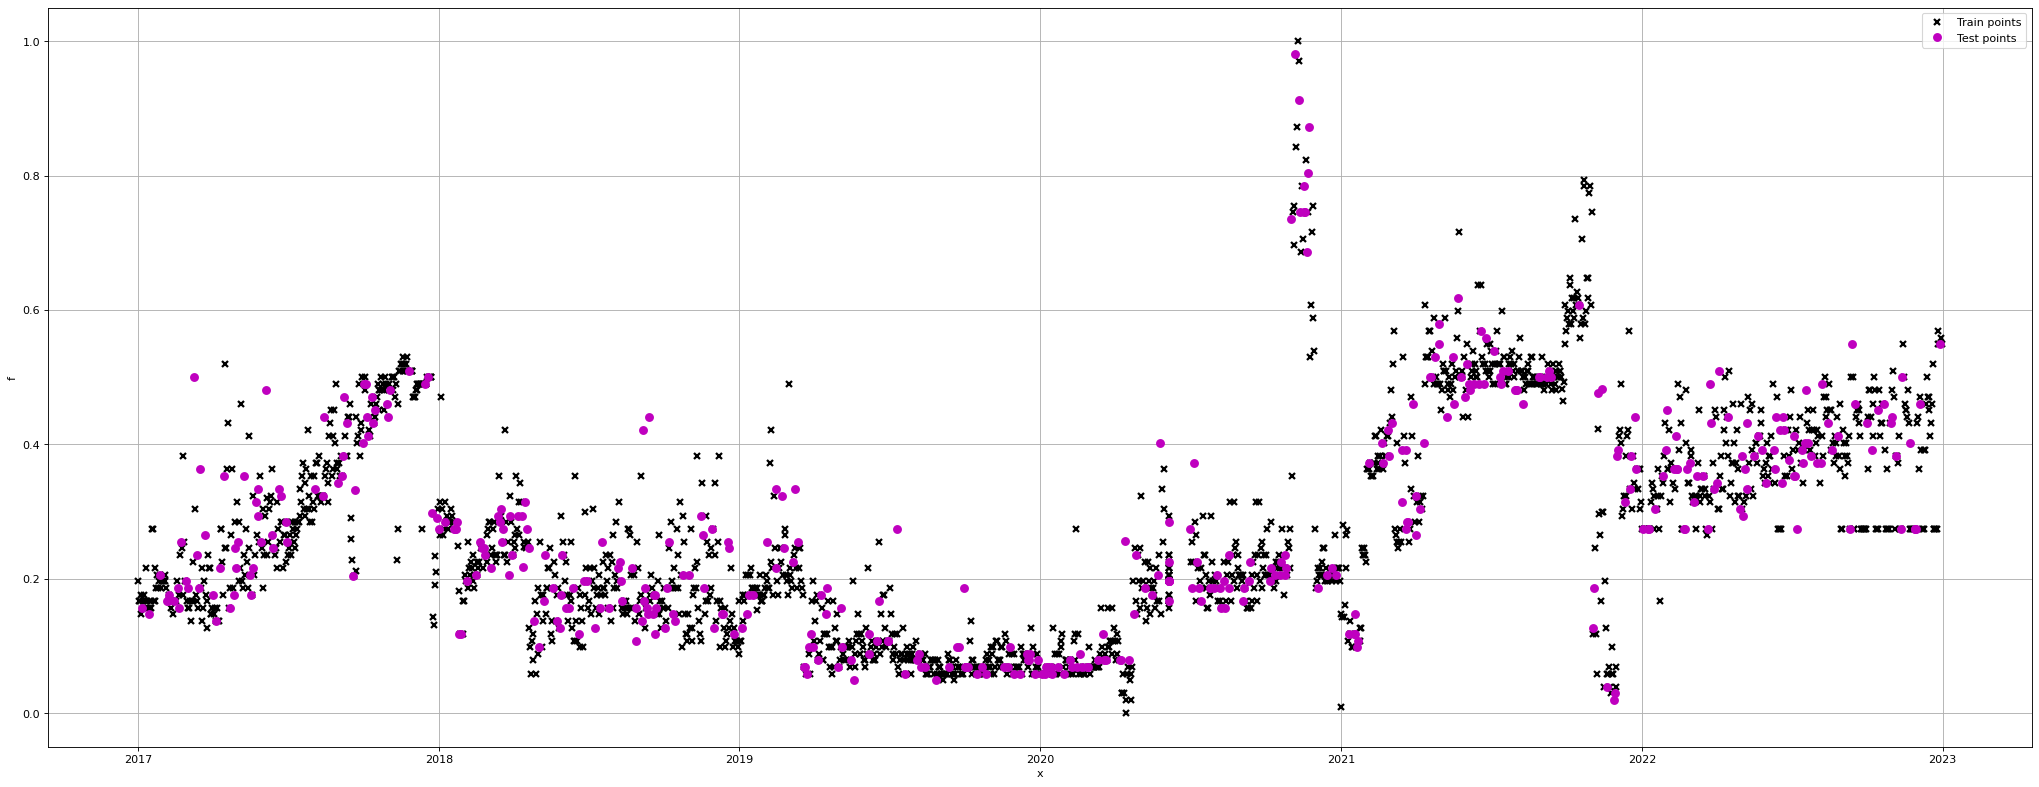

In [3]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## RBF Kernel

In [4]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="rbf", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.080
MSE: 0.006
MAE: 0.052
R-squared: 0.751

Evaluation Metrics - Training Data:
RMSE: 0.078
MSE: 0.006
MAE: 0.051
R-squared: 0.762


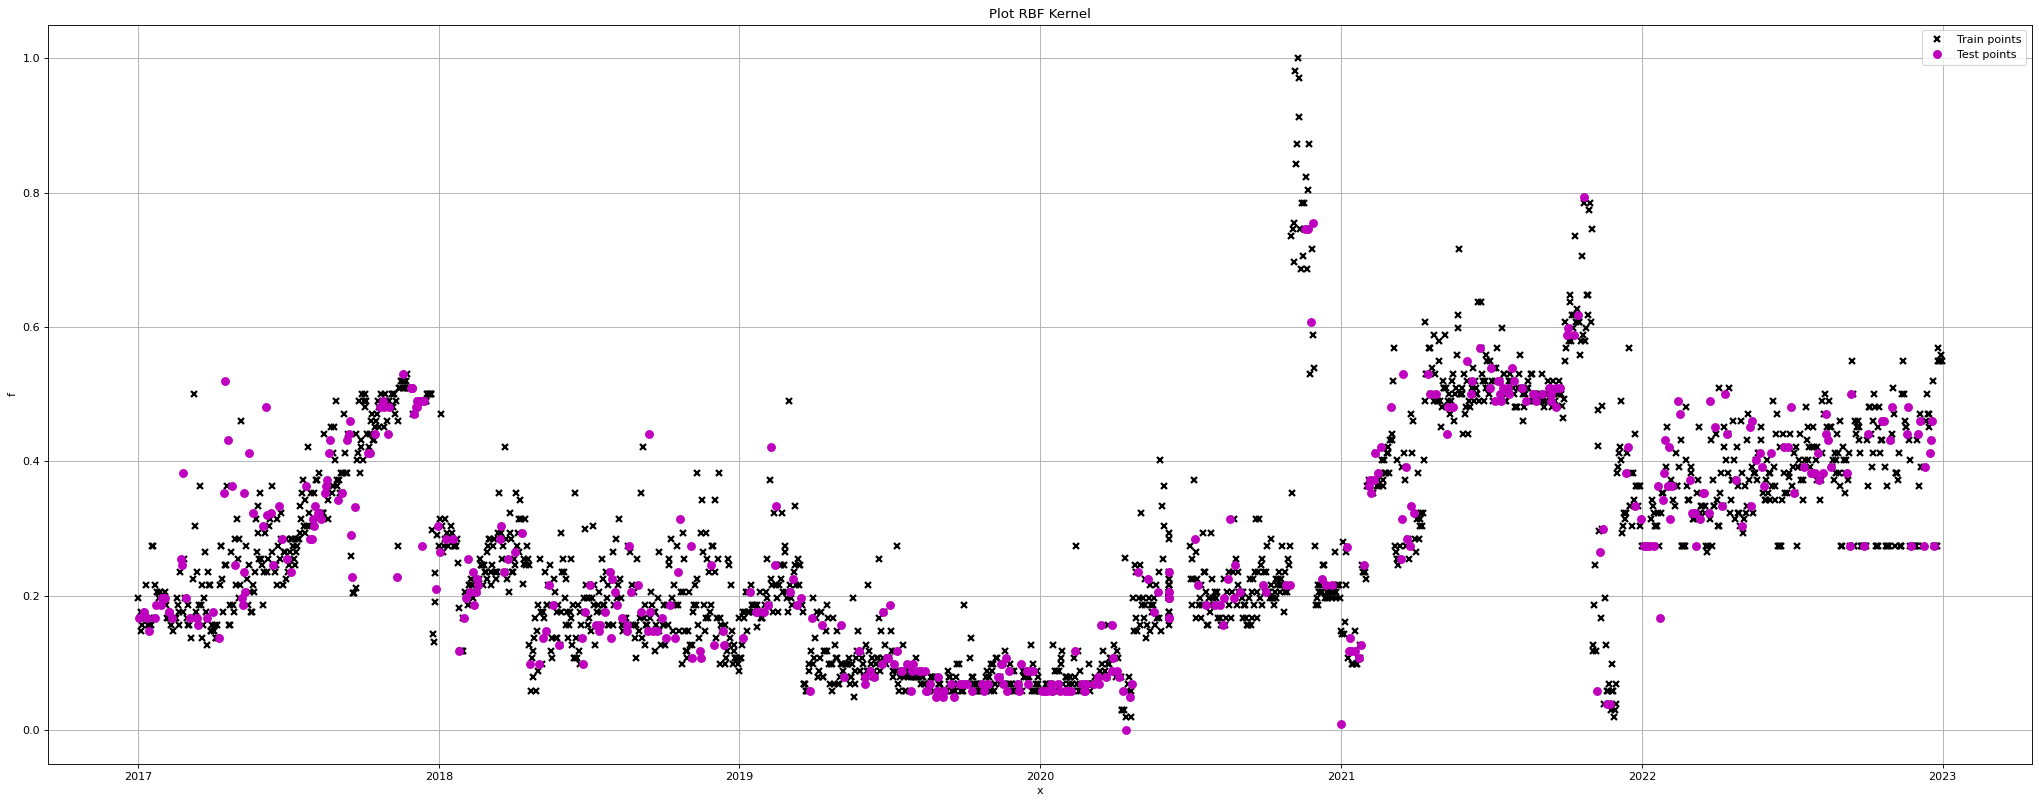

In [5]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot RBF Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Linear Kernel

In [6]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="linear", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.182
MSE: 0.033
MAE: 0.156
R-squared: -0.296

Evaluation Metrics - Training Data:
RMSE: 0.181
MSE: 0.033
MAE: 0.156
R-squared: -0.299


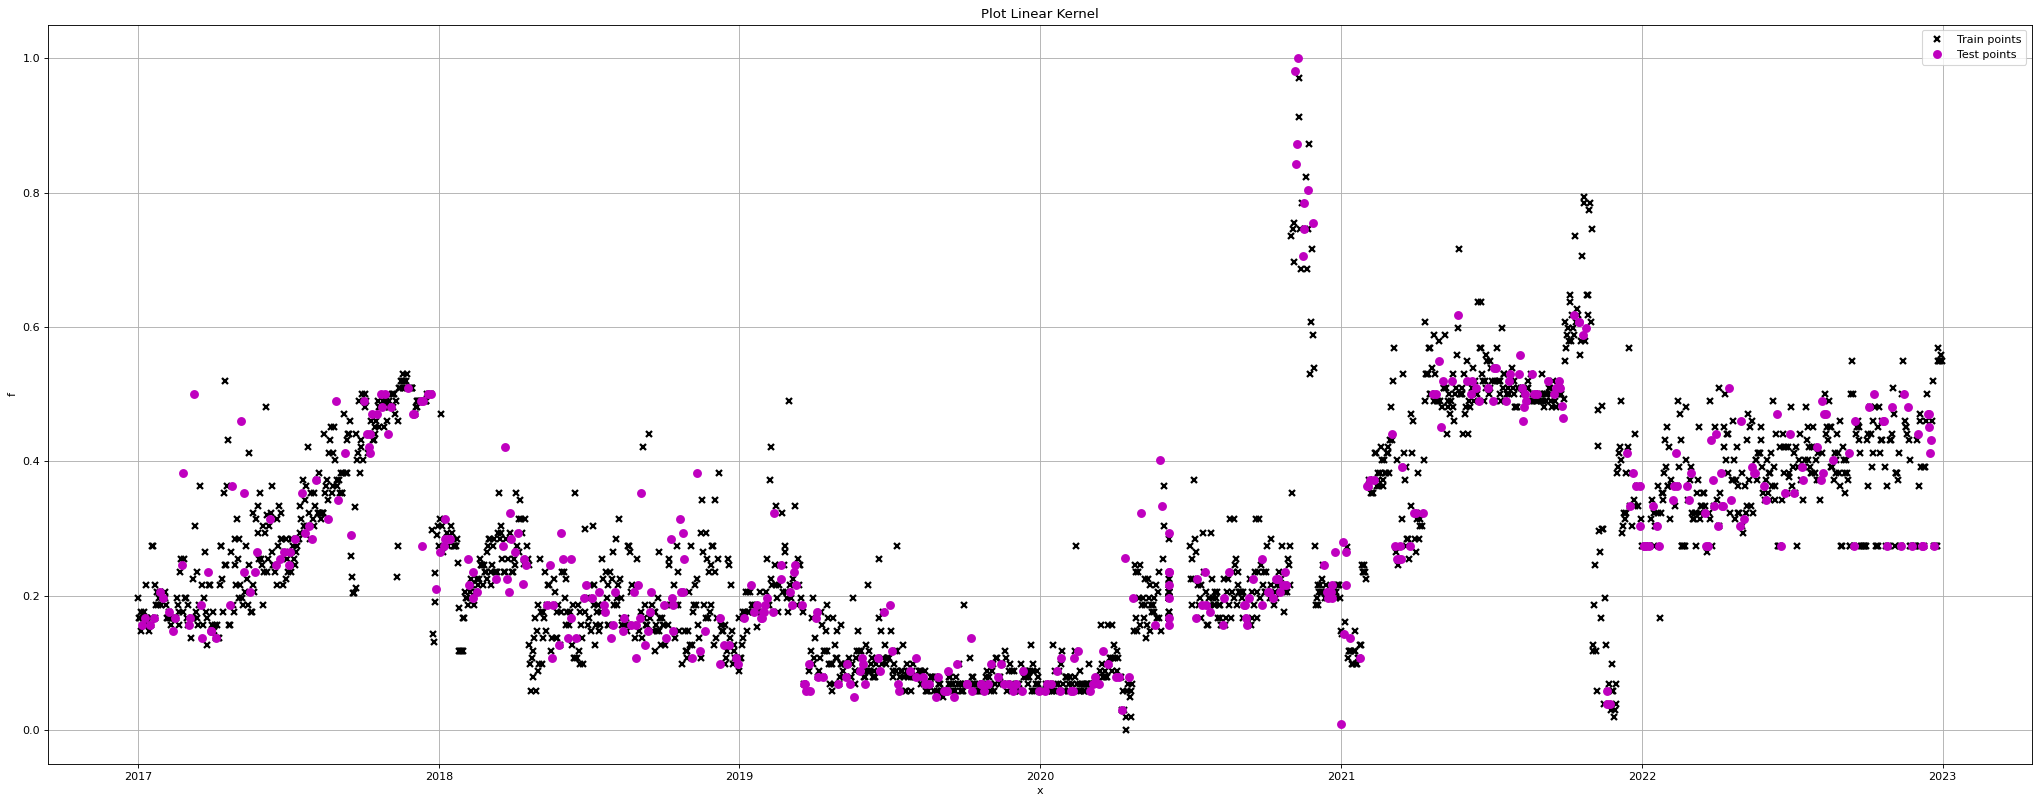

In [7]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Linear Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Sigmoid Kernel

In [8]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="sigmoid", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.187
MSE: 0.035
MAE: 0.137
R-squared: -0.402

Evaluation Metrics - Training Data:
RMSE: 0.170
MSE: 0.029
MAE: 0.128
R-squared: -0.120


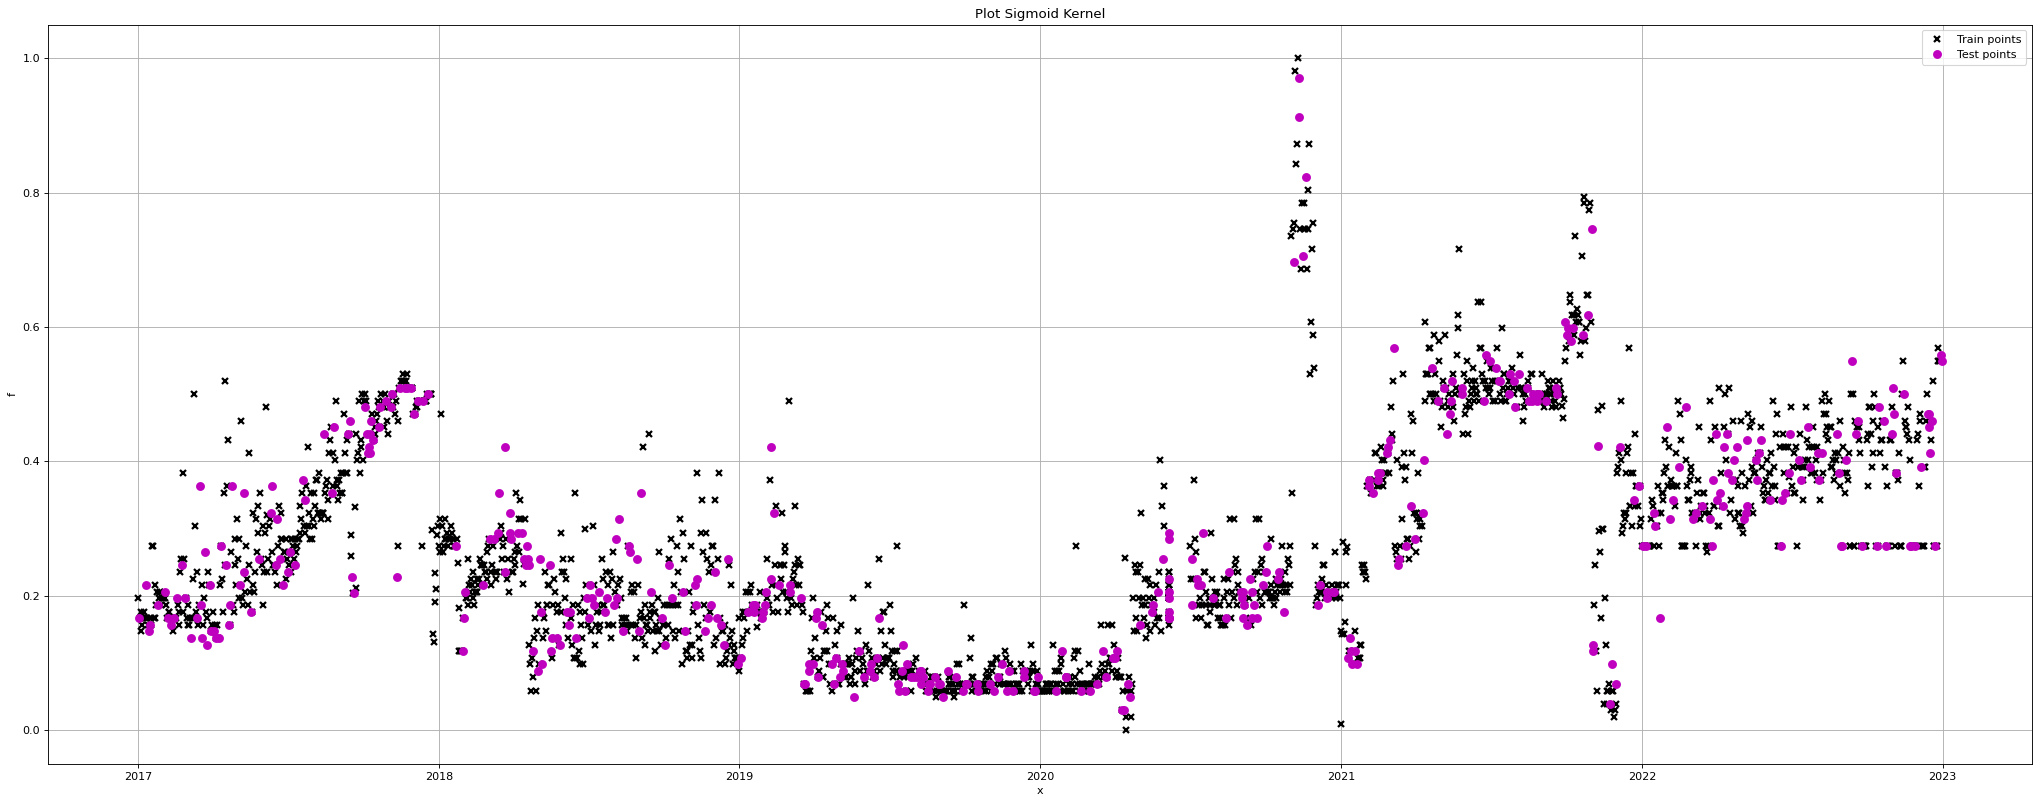

In [9]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Sigmoid Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Cosine Kernel

In [10]:
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross Validation
for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    kelmor = KELMOR(C=C_value, kernel="cosine", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics - Test Data:")
print("RMSE: %.3f" % rmse_score)
print("MSE: %.3f" % mean_mse)
print("MAE: %.3f" % mean_mae)
print("R-squared: %.3f" % mean_r2)

# Make predictions on training data
y_train_pred = kelmor.predict(X_train)

# Calculate mean squared error of the predictions on training data
mse_train = mse(y_train, y_train_pred)

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared score on training data
r2_train = r2_score(y_train, y_train_pred)

# Calculate root mean square error on training data
rmse_train = np.sqrt(mse_train)

print("\nEvaluation Metrics - Training Data:")
print("RMSE: %.3f" % rmse_train)
print("MSE: %.3f" % mse_train)
print("MAE: %.3f" % mae_train)
print("R-squared: %.3f" % r2_train)


Evaluation Metrics - Test Data:
RMSE: 0.165
MSE: 0.027
MAE: 0.130
R-squared: -0.058

Evaluation Metrics - Training Data:
RMSE: 0.166
MSE: 0.028
MAE: 0.131
R-squared: -0.055


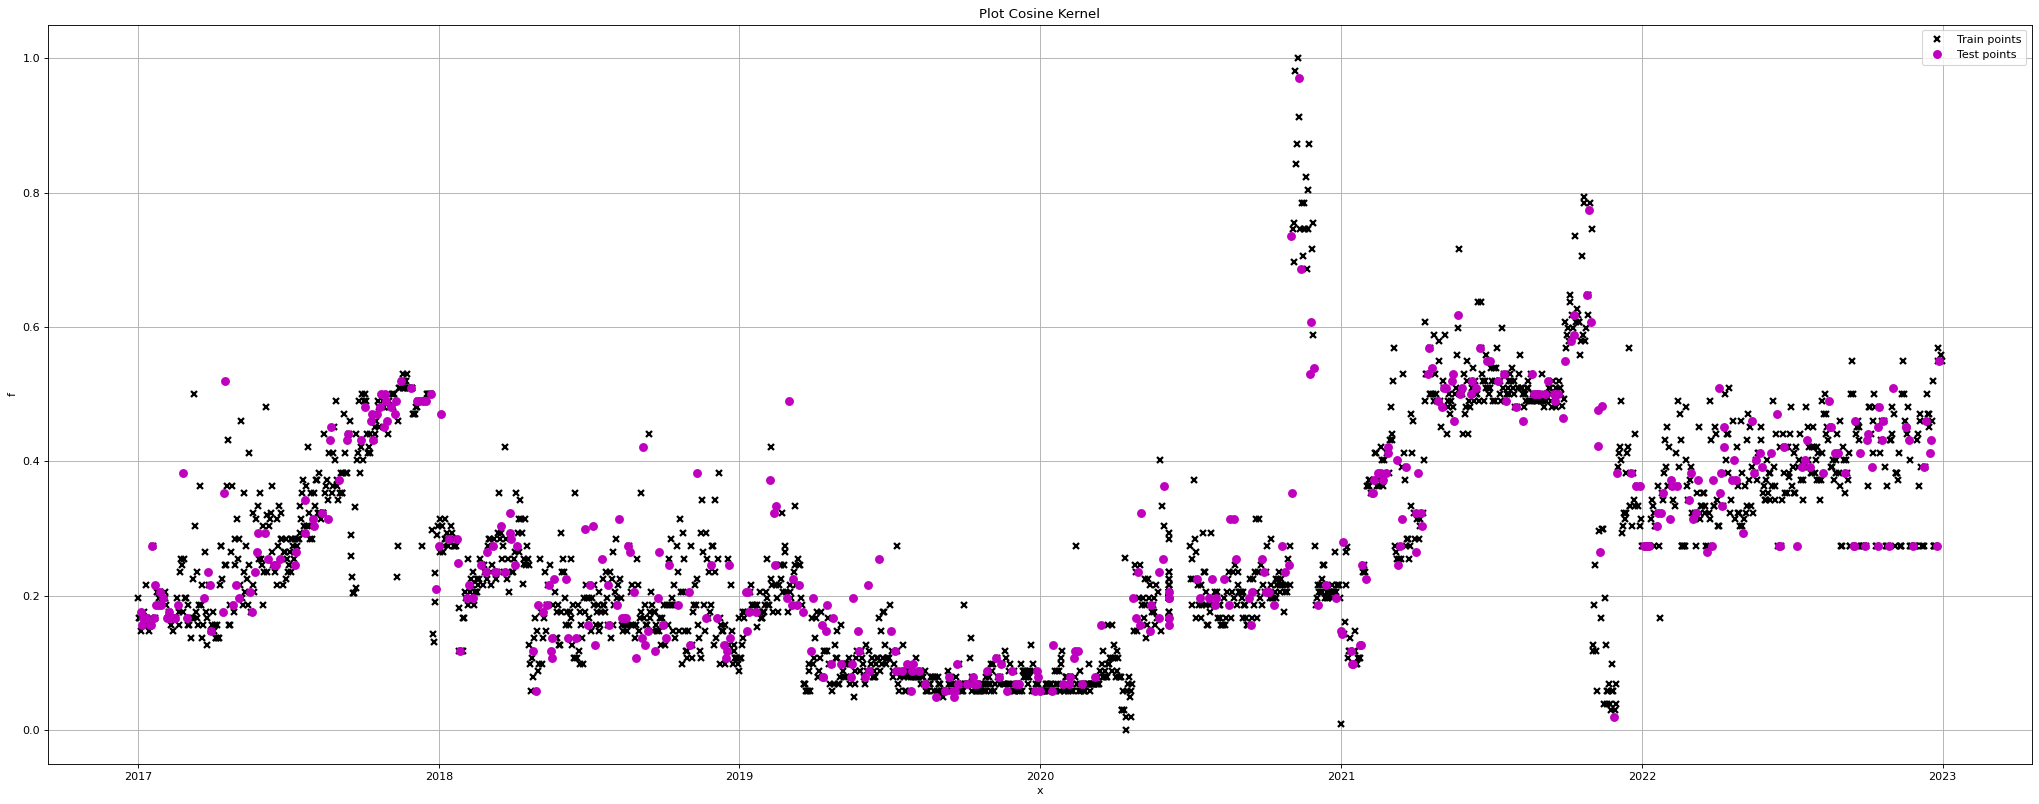

In [11]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI2['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI2['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Cosine Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()